In [2]:
#importing all the needed library
import pandas as pd
import numpy as np
from sklearn import preprocessing
import statistics 
from sklearn.preprocessing import Imputer

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import  precision_score, recall_score,f1_score,accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import validation_curve

In [3]:
#load csv file
dirtyfile = pd.read_csv('./dataset1_dirty.csv')

#checking null values in entire dataset
dirtyfile.isnull().values.any().sum()  

#checking datatype for integer columns
dirtyfile.dtypes


age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
salary            object
dtype: object

In [4]:
#replacing negative value and zero with average value for age column
dirtyfile.loc[dirtyfile.iloc[:,0] < 0, 'age'] = 0
dirtyfile.iloc[:,0].replace(0,38,inplace=True)

#replacing multiple values for the same category with a single term for the 'workclass' column
dirtyfile.iloc[:,1] = dirtyfile.iloc[:,1].str.replace('-','')
dirtyfile.iloc[:,1] = dirtyfile.iloc[:,1].str.replace(' ','')
dirtyfile.iloc[:,1].replace('?','private',inplace=True)
dirtyfile.iloc[:,1] = dirtyfile.iloc[:,1].str.lower()
dirtyfile.iloc[:,1].unique()
dirtyfile.iloc[:,1].replace(['selfempnotinc','selfempnotnc','selfempotinc','selfempotnc'],'Self-emp-not-inc',inplace=True)
dirtyfile.iloc[:,1].replace(['selfempinc','selfempnc'],'Self-emp-inc',inplace=True)

#replacing multiple values for the same category with a single term for the 'ocuupation' column
dirtyfile.iloc[:,6] = dirtyfile.iloc[:,6].str.replace('-','')
dirtyfile.iloc[:,6] = dirtyfile.iloc[:,6].str.replace(' ','')
dirtyfile.iloc[:,6] = dirtyfile.iloc[:,6].str.lower()
dirtyfile.iloc[:,6].replace('?','Craft-repair',inplace=True)
dirtyfile.iloc[:,6].replace(['echsupport','tehsupport','techsupport','tchsupport','techsuppor','techsuppot','tecsupport','techsupprt','techupport','techspport','tesupport','techsuport'],'Tech-support',inplace=True)
dirtyfile.iloc[:,6].replace(['raftrepair','cratreair','cftrepair','caftrepai','catrepair','crftrepir','crafrepair','craftrepar','cratrepair','cratepair','craftrepai','craftepair','craftrepir','craftreair','craftrepair','caftrepair', 'crftrepair', 'craftrpair'],'Craft-repair',inplace=True)
dirtyfile.iloc[:,6].replace(['otherervice','otherservice','othersevice','othrservice','oterservice','otherservic','otherservie','otheservice','othersrvice','oherservice','othrservce','therservice','otherservce','othersrvic','otherserice'],'Other-service',inplace=True)
dirtyfile.iloc[:,6].replace(['sales','sles','saes','sale','ales','sle','aes','sals','sas','ale'],'Sales',inplace=True)
dirtyfile.iloc[:,6].replace(['Exec-managerial','execmanagerial','execmanageria','exemanagerial','execmnagerial','execmanagrial','execmanageral','excmanagerial','xecmanagerial','execmanageril','execmanaerial','execmangerial','execmanageial','execanagerial','execmaagerial','eecmanagerial','eecmanageral','eecmanageial'],'Exec-managerial',inplace=True)
dirtyfile.iloc[:,6].replace(['prospecialty','profspecialty','profspeialty','pofspecialty','profspecilty','profspecialt','rofspecialty','prfspecialty','profsecialty','profspcialty','profpecialty','profspecialy','profspeciaty','profspecalty','prspecialty'],'Prof-specialty',inplace=True)
dirtyfile.iloc[:,6].replace(['handlerscleaners','handlercleaners','handlerscleanes','hanlerscleaners','andlerscleaners','handerscleaners','handlersleaners','handlescleaners','handlerscleners','handlrscleaners','handlerscleaner','handlerscleaers','hadlerscleaners','hadlerscleaners','handlerscleanrs','hndlerscleaners','handlersclaners','handlersceaners','handlescleanes','handlersceners'],'Handlers-cleaners',inplace=True)
dirtyfile.iloc[:,6].replace(['machineopinspct','machineopinspt','machineopinsct','machineopinspc','machineopispct','macineopinspct','machinepinspct','mahineopinspct','machinopinspct','mchineopinspct','machineoinspct','machineopnspct','machineopinpct','machieopinspct','machneopinspct','achineopinspct'],'Machine-op-inspct',inplace=True)
dirtyfile.iloc[:,6].replace(['dmclrical','admclerical','admclerica','dmclerical','amclerical','admcerical','admclercal','admclericl','adclerical','admclrical','admlerical','admcleical','adclerica','admclerial','admlercal','adcerical','admcleial','adclrical','amclerica'],'Adm-clerical',inplace=True)
dirtyfile.iloc[:,6].replace(['farminfishing','farmingihing','farmingfishing','farmingfishin','farmigfishing','farmingfshing','faringfishing','armingfishing','farmingfishng','farmingfishig','farmingfising','farmingishing','farmingfising','farmingishing','frmingfishing','farmngfishing','famingfishing','farmingfihing'],'Farming-fishing',inplace=True)
dirtyfile.iloc[:,6].replace(['tansportmoving','ransportmoving','transpotmoving','trnsportmoving', 'transpormovig', 'transortmoving','tranportmoving','transportmoving','transportoving','transportmovin','transportmovig','transortmovng','transportmving','transprtmoving','transportmovng','transportmoing','transpormoving','trasportmoving','transportovng'],'Transport-moving',inplace=True)
dirtyfile.iloc[:,6].replace(['privhouseserv','privhouseerv','privhuseserv','privhouseser','privhoueserv','privhoseserv','privhousserv'],'Priv-house-serv',inplace=True)
dirtyfile.iloc[:,6].replace(['protectiveserv', 'proectiveserv', 'potectiveserv','protetiveserv','proteciveserv','protctiveserv','protectiveerv','prtectiveserv','protectveserv','rotectiveserv', 'protectieserv', 'protectivserv', 'protectivesev','protectiveser', 'protectivesrv'],' Protective-serv',inplace=True)
dirtyfile.to_csv('./dataset1_processed.csv',index=False,header=False)


In [5]:
dirtyfile_res = pd.read_csv('./dataset1_processed.csv')

In [6]:
age = dirtyfile_res.iloc[:,0]._get_numeric_data()
fnl_wgt = dirtyfile_res.iloc[:,2]._get_numeric_data()
education_num = dirtyfile_res.iloc[:,4]._get_numeric_data()
capital_gain = dirtyfile_res.iloc[:,10]._get_numeric_data()
capital_loss = dirtyfile_res.iloc[:,11]._get_numeric_data()
hours_per_week = dirtyfile_res.iloc[:,12]._get_numeric_data()

print("rows", dirtyfile_res.iloc[:,0].count())
print("age: mean:", age.mean(),"min:", age.min(), "max:", age.max(), "std:", age.std())

print("work_class values:", len(dirtyfile_res.iloc[:,1].unique()))
cat_workclass = dirtyfile_res.iloc[:,1].value_counts()
for i, v in cat_workclass.iteritems():
    print('  ',i,v)

print("fnlwgt: mean:", fnl_wgt.mean(), "min:", fnl_wgt.min(), "max:", fnl_wgt.max(), "std:", fnl_wgt.std())

print("education values:", len(dirtyfile_res.iloc[:,3].unique()))
cat_education = dirtyfile_res.iloc[:,3].value_counts()
for i, v in cat_education.iteritems():
    print('  ',i,v)
    
print("education_num: mean:", education_num.mean(), "min:", education_num.min(), "max:", education_num.max(), "std:", education_num.std())

print("marital_status values:", len(dirtyfile_res.iloc[:,5].unique()))
cat_marital_status = dirtyfile_res.iloc[:,5].value_counts()
for i, v in cat_marital_status.iteritems():
    print('  ',i,v)
    

print("Occupation values:", len(dirtyfile_res.iloc[:,6].unique()))
cat_occupation = dirtyfile_res.iloc[:,6].value_counts()
for i, v in cat_occupation.iteritems():
    print('  ',i,v)

print("relationship values:", len(dirtyfile_res.iloc[:,7].unique()))
cat_relationship = dirtyfile_res.iloc[:,7].value_counts()
for i, v in cat_relationship.iteritems():
    print('  ',i,v)
    
print("race values:", len(dirtyfile_res.iloc[:,8].unique()))
cat_race = dirtyfile_res.iloc[:,8].value_counts()
for i, v in cat_race.iteritems():
    print('  ',i,v)
    
print("sex values:", len(dirtyfile_res.iloc[:,9].unique()))
cat_sex = dirtyfile_res.iloc[:,9].value_counts()
for i, v in cat_sex.iteritems():
    print('  ',i,v)
    
print("capital_gain: mean:", capital_gain.mean(), "min:", capital_gain.min(), "max:", capital_gain.max(), "std:", capital_gain.std())

print("capital_loss: mean:", capital_loss.mean(), "min:", capital_loss.min(), "max:", capital_loss.max(), "std:", capital_loss.std())

print("hours_per_week: mean:", hours_per_week.mean(), "min:", hours_per_week.min(), "max:", hours_per_week.max(), "std:", hours_per_week.std())

print("native_country values:", len(dirtyfile_res.iloc[:,13].unique()))
cat_native_country = dirtyfile_res.iloc[:,13].value_counts()
for i, v in cat_native_country.iteritems():
    print('  ',i,v)
    
print("Salary values:", len(dirtyfile_res.iloc[:,14].unique()))
cat_salary = dirtyfile_res.iloc[:,14].value_counts()
for i, v in cat_salary.iteritems():
    print('  ',i,v)

rows 30161
age: mean: 38.4162991943238 min: 17 max: 90 std: 12.937004257363446
work_class values: 7
   private 22447
   Self-emp-not-inc 2451
   localgov 2019
   stategov 1254
   Self-emp-inc 1053
   federalgov 923
   withoutpay 14
fnlwgt: mean: 189797.5565465336 min: 13769 max: 1484705 std: 105652.74491875793
education values: 16
   HS-grad 9840
   Some-college 6678
   Bachelors 5043
   Masters 1627
   Assoc-voc 1307
   11th 1048
   Assoc-acdm 1008
   10th 820
   7th-8th 557
   Prof-school 542
   9th 455
   12th 377
   Doctorate 375
   5th-6th 288
   1st-4th 151
   Preschool 45
education_num: mean: 10.121216140048407 min: 1 max: 16 std: 2.5499833163229204
marital_status values: 7
   Married-civ-spouse 14065
   Never-married 9725
   Divorced 4214
   Separated 939
   Widowed 827
   Married-spouse-absent 370
   Married-AF-spouse 21
Occupation values: 14
   Craft-repair 4570
   Prof-specialty 3966
   Exec-managerial 3913
   Adm-clerical 3644
   Sales 3498
   Other-service 3153
   Machine-

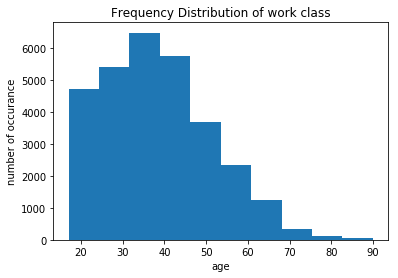

In [7]:
age_histogram  = dirtyfile_res.iloc[:,0]._get_numeric_data()
plt.hist(age_histogram)
plt.title('Frequency Distribution of work class')
plt.xlabel('age')
plt.ylabel('number of occurance')
plt.show()

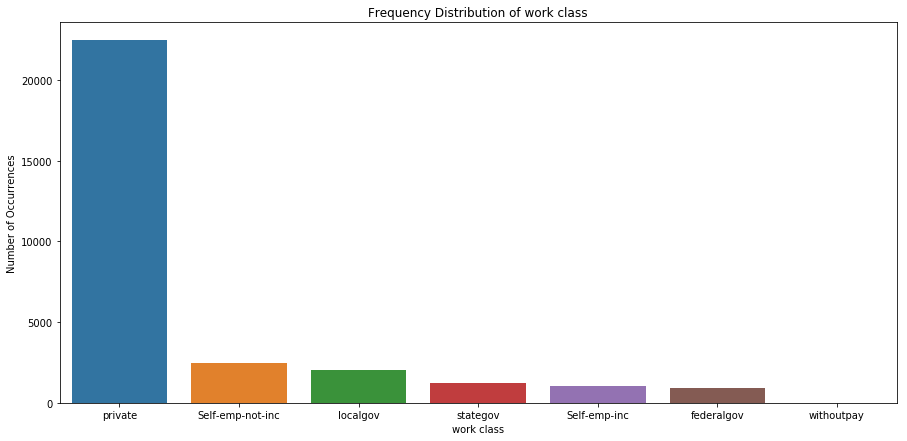

In [8]:
workclass_count = dirtyfile_res['stategov'].value_counts()
plt.figure(figsize=(15,7))
sns.barplot(workclass_count.index, workclass_count.values)
plt.title('Frequency Distribution of work class')
plt.xlabel('work class')
plt.ylabel('Number of Occurrences')
plt.show()

In [9]:
#load preprocessed CSV file
dirtyfile = pd.read_csv('./dataset1_processed.csv',header=None)
dirtyfile.columns = ['age', 'workclass', 'fnlwgt','education','education_num','marital_status','occupation','relation','race','sex','capital_gain','capital_loss','hours_per_week','native_country','salary']
dirtyfile.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relation,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,stategov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 1. Coverting All the categorical values into binary values with dummy columns and and normalized every column which contains numerical values

All the categorical Columns are converted into binary columns because If Columns is coverted into numercal columns then machine learning algorithm access these numerical values as a weight of the column, so it will not give the satisfied output. 

All the numercal columns are normalized so that these will not affect the mathematical calculation of the machine learning algorithm as there is huge difference between two columns like age and fnlwgt. If these columns are properly normalized then the values of those columns rely between same range.

In [10]:

# Replacing Categorical column into binary value using getdummies() method

dirtyfile.iloc[:,14].replace('<=50K','1',inplace=True)
dirtyfile.iloc[:,14].replace('>50K','0',inplace=True)
dirtyfile.iloc[:,9].replace('Male','1',inplace=True)
dirtyfile.iloc[:,9].replace('Female','0',inplace=True)

dirtyfile.iloc[:,1] = dirtyfile.iloc[:,1].astype('category')
dirtyfile.iloc[:,3] = dirtyfile.iloc[:,3].astype('category')
dirtyfile.iloc[:,5] = dirtyfile.iloc[:,5].astype('category')
dirtyfile.iloc[:,6] = dirtyfile.iloc[:,6].astype('category')
dirtyfile.iloc[:,7] = dirtyfile.iloc[:,7].astype('category')
dirtyfile.iloc[:,8] = dirtyfile.iloc[:,8].astype('category')
dirtyfile.iloc[:,9] = dirtyfile.iloc[:,9].astype('category')
dirtyfile.iloc[:,13] = dirtyfile.iloc[:,13].astype('category')

Labelled_dirtyfile = pd.get_dummies(dirtyfile, columns=['workclass','education','marital_status','occupation','relation','race','native_country'],prefix = ['workclass','education','marital_status','occupation','relationship','race','native_country'])
print(Labelled_dirtyfile.head())
Labelled_dirtyfile.to_csv('./dataset1_final.csv',index=False)




#Load the test_data CSV file and applying the same function as I did with the preprocessed data set

dirtyfile_test = pd.read_csv('./dataset1_test.csv',header=None)
dirtyfile_test.columns = ['age', 'workclass', 'fnlwgt','education','education_num','marital_status','occupation','relation','race','sex','capital_gain','capital_loss','hours_per_week','native_country']
dirtyfile_test.iloc[:,9].replace('Male','1',inplace=True)
dirtyfile_test.iloc[:,9].replace('Female','0',inplace=True)

dirtyfile_test.iloc[:,1] = dirtyfile_test.iloc[:,1].astype('category')
dirtyfile_test.iloc[:,3] = dirtyfile_test.iloc[:,3].astype('category')
dirtyfile_test.iloc[:,5] = dirtyfile_test.iloc[:,5].astype('category')
dirtyfile_test.iloc[:,6] = dirtyfile_test.iloc[:,6].astype('category')
dirtyfile_test.iloc[:,7] = dirtyfile_test.iloc[:,7].astype('category')
dirtyfile_test.iloc[:,8] = dirtyfile_test.iloc[:,8].astype('category')
dirtyfile_test.iloc[:,9] = dirtyfile_test.iloc[:,9].astype('category')
dirtyfile_test.iloc[:,13] = dirtyfile_test.iloc[:,13].astype('category')

Labelled_dirtyfile_test = pd.get_dummies(dirtyfile_test, columns=['workclass','education','marital_status','occupation','relation','race','native_country'],prefix = ['workclass','education','marital_status','occupation','relationship','race','native_country'])
print(Labelled_dirtyfile_test.head())
Labelled_dirtyfile_test.to_csv('./dataset1_final_test.csv',index=False)

   age  fnlwgt  education_num sex  capital_gain  capital_loss  hours_per_week  \
0   39   77516             13   1          2174             0              40   
1   50   83311             13   1             0             0              13   
2   38  215646              9   1             0             0              40   
3   53  234721              7   1             0             0              40   
4   28  338409             13   0             0             0              40   

  salary  workclass_Self-emp-inc  workclass_Self-emp-not-inc  ...  \
0      1                       0                           0  ...   
1      1                       0                           1  ...   
2      1                       0                           0  ...   
3      1                       0                           0  ...   
4      1                       0                           0  ...   

   native_country_Portugal  native_country_Puerto-Rico  \
0                        0              

In [11]:

#reading csv file after coverting categorical data into binary values
final_dataset = pd.read_csv('./dataset1_final.csv')
final_dataset['age'] = final_dataset['age'].astype('float')

#test dataset
final_dataset_test = pd.read_csv('./dataset1_final_test.csv')
final_dataset_test['age'] = final_dataset_test['age'].astype('float')


In [12]:
#Normalizing all the numerical rows of preprocessed dataset

train_norm = final_dataset[final_dataset.columns[0:3]]
train_norm_sub = final_dataset[final_dataset.columns[4:7]]

std_scale = preprocessing.StandardScaler().fit(train_norm)
x_train_norm = std_scale.transform(train_norm)
training_norm_col = pd.DataFrame(x_train_norm, index=train_norm.index, columns=train_norm.columns) 
normalized_data = final_dataset.update(training_norm_col)


std_scale_sub = preprocessing.StandardScaler().fit(train_norm_sub)
x_train_norm_sub = std_scale_sub.transform(train_norm_sub)
training_norm_col_sub = pd.DataFrame(x_train_norm_sub, index=train_norm_sub.index, columns=train_norm_sub.columns) 
normalized_data_sub = final_dataset.update(training_norm_col_sub)


print (final_dataset.head())

final_dataset.to_csv('./dataset1_final.csv',index=False)





C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  del sys.path[0]


        age    fnlwgt  education_num  sex  capital_gain  capital_loss  \
0  0.045119 -1.062722       1.128918    1      0.146092     -0.218586   
1  0.895421 -1.007871       1.128918    1     -0.147445     -0.218586   
2 -0.032182  0.244693      -0.439738    1     -0.147445     -0.218586   
3  1.127322  0.425240      -1.224066    1     -0.147445     -0.218586   
4 -0.805184  1.406658       1.128918    0     -0.147445     -0.218586   

   hours_per_week  salary  workclass_Self-emp-inc  workclass_Self-emp-not-inc  \
0       -0.077734       1                       0                           0   
1       -2.331531       1                       0                           1   
2       -0.077734       1                       0                           0   
3       -0.077734       1                       0                           0   
4       -0.077734       1                       0                           0   

   ...  native_country_Portugal  native_country_Puerto-Rico  \
0  ...     

In [13]:
#Normalizing numerical rows for test dataset

train_norm_test = final_dataset_test[final_dataset_test.columns[0:3]]
train_norm_sub_test = final_dataset_test[final_dataset_test.columns[4:7]]

std_scale_test = preprocessing.StandardScaler().fit(train_norm_test)
x_train_norm_test = std_scale_test.transform(train_norm_test)
training_norm_col_test = pd.DataFrame(x_train_norm_test, index=train_norm_test.index, columns=train_norm_test.columns) 
normalized_data_test = final_dataset_test.update(training_norm_col_test)


std_scale_sub_test = preprocessing.StandardScaler().fit(train_norm_sub_test)
x_train_norm_sub_test = std_scale_sub_test.transform(train_norm_sub_test)
training_norm_col_sub_test = pd.DataFrame(x_train_norm_sub_test, index=train_norm_sub_test.index, columns=train_norm_sub_test.columns) 
normalized_data_sub_test = final_dataset_test.update(training_norm_col_sub_test)




'''std_scale_sub_test = preprocessing.StandardScaler().fit(train_norm_sub_test)
x_train_norm_sub_test = std_scale_sub_test.transform(train_norm_sub_test)
training_norm_col_sub_test = pd.DataFrame(x_train_norm_sub_test, index=train_norm_sub_test.index, columns=train_norm_sub_test.columns) 
normalized_data_sub_test = final_dataset_test.update(training_norm_col_sub_test)

'''
print (final_dataset_test.head())
final_dataset_test.insert(65,"native_country_Holand-Netherlands", True) 


final_dataset_test.to_csv('./dataset1_final_test.csv',index=False)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  del sys.path[0]


        age    fnlwgt  education_num  sex  capital_gain  capital_loss  \
0 -1.029005  0.352098      -1.216563    1     -0.145438     -0.219169   
1 -0.057423 -0.944995      -0.434898    1     -0.145438     -0.219169   
2 -0.804794  1.395062       0.737599    1     -0.145438     -0.219169   
3  0.391000 -0.277369      -0.044066    1      0.852624     -0.219169   
4 -0.356371  0.085944      -1.607395    1     -0.145438     -0.219169   

   hours_per_week  workclass_Federal-gov  workclass_Local-gov  \
0       -0.078889                      0                    0   
1        0.750131                      0                    0   
2       -0.078889                      0                    1   
3       -0.078889                      0                    0   
4       -0.907909                      0                    0   

   workclass_Private  ...  native_country_Portugal  \
0                  1  ...                        0   
1                  1  ...                        0   
2       

# 2. Divide data into train and validation set


In [14]:
#divide data into train and test set
x = final_dataset.loc[:, final_dataset.columns != 'salary']
y = final_dataset['salary']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=42)

#test dataset
x_test = final_dataset_test.loc[:, :]
x_test.head()



,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,-1.029005,0.352098,-1.216563,1,-0.145438,-0.219169,-0.078889,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-0.057423,-0.944995,-0.434898,1,-0.145438,-0.219169,0.750131,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,-0.804794,1.395062,0.737599,1,-0.145438,-0.219169,-0.078889,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.391000,-0.277369,-0.044066,1,0.852624,-0.219169,-0.078889,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,-0.356371,0.085944,-1.607395,1,-0.145438,-0.219169,-0.907909,0,0,1,...,0,0,0,0,0,0,0,1,0,0


# 3(a). Train the given dataset using 4 of the machine learning classification algorithm

In [15]:
#classification using decision tree
decison_clf = DecisionTreeClassifier().fit(X_train, y_train)

y_pred_decision_clf=decison_clf.predict(X_test)
dec_score = accuracy_score(y_test, y_pred_decision_clf) 
print( "accuracy score:",dec_score)

avg_accuracy_score_decision = balanced_accuracy_score(y_test, y_pred_decision_clf)
print("average class accuracy",avg_accuracy_score_decision)

accuracy score: 0.8038268447475608
average class accuracy 0.7392334821181836


In [16]:
#classification using LogisticRegression

log_regression_clf = LogisticRegression().fit(X_train, y_train)
y_pred_log_regression_clf=log_regression_clf.predict(X_test)

Log_score = accuracy_score(y_test, y_pred_log_regression_clf)
print( "accuracy score:", Log_score)

avg_accuracy_score_logistic = balanced_accuracy_score(y_test, y_pred_log_regression_clf)
print("average class accuracy",avg_accuracy_score_logistic)
 


accuracy score: 0.8499573742540495
average class accuracy 0.7704292690832617


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
#classification using SVM

log_SVC_clf = SVC().fit(X_train, y_train)
y_pred_LinearSVC_clf=log_SVC_clf.predict(X_test)

SCC_Score = accuracy_score(y_test, y_pred_LinearSVC_clf)
print( "accuracy score:",SCC_Score)

avg_accuracy_score_linear = balanced_accuracy_score(y_test, y_pred_LinearSVC_clf)
print("average class accuracy",avg_accuracy_score_linear)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy score: 0.8500520981339396
average class accuracy 0.7563789413004449


In [18]:
#Random Forest Algorithm

log_rf_clf=RandomForestClassifier(random_state=42)

log_rf_clf.fit(X_train, y_train)

y_pred_rf=log_rf_clf.predict(X_test)

rf_Score = accuracy_score(y_test, y_pred_rf)
print("accuracy score ",rf_Score)


avg_accuracy_score_rf = balanced_accuracy_score(y_test, y_pred_rf)
print("average class accuracy",avg_accuracy_score_rf)


accuracy score  0.8371696504688833
average class accuracy 0.7799959219654007


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# 3-b. Comparing results of 4 machine algorithms

Among the four algorithms, Logistic Regression is more suitable for the given dataset comapre to other as it yields the highest accuracy as well as the highest average class accuracy. 

Average class accuracy is always lesser than the accuracy score as shown in the graph.

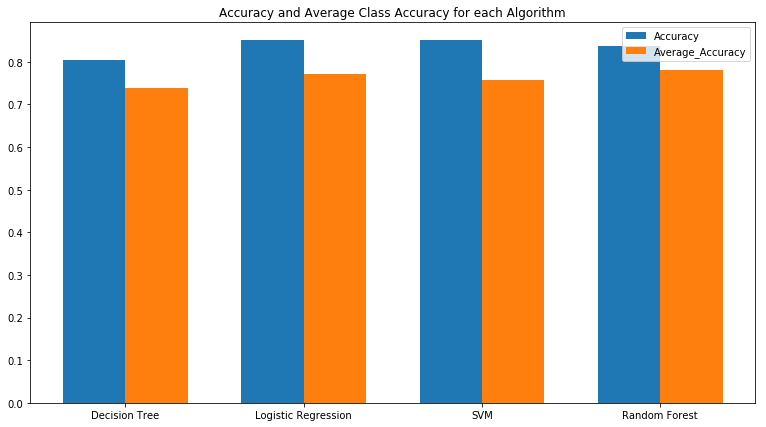

In [19]:
#compare the accuracy and average_class accuracy for each algorithm 
no_of_algorithm = 4
accuracy = [dec_score, Log_score, SCC_Score,rf_Score]
average_class_accuracy = [avg_accuracy_score_decision, avg_accuracy_score_logistic, avg_accuracy_score_linear,avg_accuracy_score_rf]

no = np.arange(no_of_algorithm) 
width = 0.35       
plt.figure(figsize=(13,7))
plt.bar(no, accuracy, width, label='Accuracy')
plt.bar(no + width, average_class_accuracy, width, label='Average_Accuracy')
plt.title('Accuracy and Average Class Accuracy for each Algorithm')
plt.xticks(no + width / 2, ('Decision Tree', 'Logistic Regression', 'SVM','Random Forest'))
plt.legend(loc='best')
plt.show()

# 4. Parameter vs Accuracy graph for Random Forest Algorithm


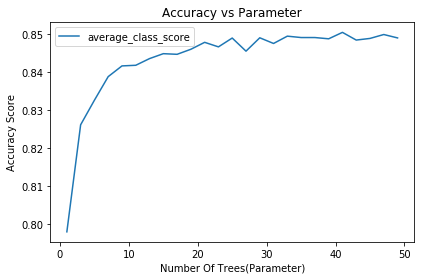

In [20]:
#parameter vs accuracy graph or random forest algorithm

param_range = np.arange(1, 50, 2)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             x, 
                                             y, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for test set scores
test_set_mean = np.mean(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, test_set_mean, label="average_class_score")

# Create plot
plt.title("Accuracy vs Parameter")
plt.xlabel("Number Of Trees(Parameter)")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

# 5. Improving the Random Forest Algorithm using GridSearch
By GridSearch, The best hyperparameters are found and then I used those parameter while training the model, which yields the best accuracy.

Few Modifications have been done in the preprocessind data. All the '?' were replace with 'not deined' in the previous assignment. This time I realized that replacing '?' values with the value with the highest accurace, would be a better option as it wont create conflict of number of columns  while applying classification model on given test dataset 

It will take 3-4 minutes to run the gridsearch algorithm as it is applying all the parameters and giving the best result. 

In [21]:
rfc=RandomForestClassifier(random_state=42)

In [22]:
param_grid = { 
    'n_estimators': [10,20,50,70],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [23]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 50, 70], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [24]:
CV_rfc.best_params_


{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 20}

In [25]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 20, max_depth=8, criterion='gini')
rfc1.fit(X_train, y_train)
pred=rfc1.predict(X_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.8526096428909729


# 6. using Logistic Regression, predict the values or salary or test data

In [26]:
#predict the value for test dataset using the trained model using logistic regression
y_pred_log_regression_clf=log_regression_clf.predict(x_test)

final_output = pd.DataFrame(y_pred_log_regression_clf)

final_output.iloc[:,0].replace(1,'<=50K',inplace=True)
final_output.iloc[:,0].replace(0,'>50K',inplace=True)
final_output.to_csv('./B00819827_prediction.csv',index=False, header = False)


Reference:

[1]"Handling Categorical Data in Python", DataCamp Community, 2019. [Online]. Available: https://www.datacamp.com/community/tutorials/categorical-data. [Accessed: 08- Jun- 2019].

[2]"Why Data Normalization is necessary for Machine Learning models", Medium, 2019. [Online]. Available: https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029. [Accessed: 08- Jun- 2019].

[3]"Bar Charts in Matplotlib – Ben Alex Keen", Benalexkeen.com, 2019. [Online]. Available: http://benalexkeen.com/bar-charts-in-matplotlib/. [Accessed: 08- Jun- 2019].

[4]"Plot The Validation Curve", Chrisalbon.com, 2019. [Online]. Available: https://chrisalbon.com/machine_learning/model_evaluation/plot_the_validation_curve/. [Accessed: 08- Jun- 2019].

[5]"scikit-learn: machine learning in Python — scikit-learn 0.21.2 documentation", Scikit-learn.org, 2019. [Online]. Available: https://scikit-learn.org/stable/. [Accessed: 08- Jun- 2019].